In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
train['brand'] = train['title'].apply(lambda x : x.split(" ")[0])
test['brand'] = test['title'].apply(lambda x: x.split(" ")[0])


In [4]:
train.brand.head()

0    Toyota
1    Toyota
2      Land
3     Lexus
4    Toyota
Name: brand, dtype: object

In [5]:
test.brand.head()

0    Mercedes-Benz
1            Honda
2    Mercedes-Benz
3           Toyota
4           Toyota
Name: brand, dtype: object

In [6]:
set(train.brand) | set(test.brand)

{'ALPINA',
 'Acura',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'DAF',
 'Dodge',
 'Fiat',
 'Ford',
 'GAC',
 'GMC',
 'Honda',
 'Hyundai',
 'IVECO',
 'IVM',
 'Infiniti',
 'Isuzu',
 'Iveco',
 'JMC',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'Lincoln',
 'MAN-VOLKSWAGEN',
 'MINI',
 'Mack',
 'Man',
 'Mazda',
 'Mercedes-Benz',
 'Mercedes-Benz/52',
 'Mitsubishi',
 'Nissan',
 'Peugeot',
 'Pontiac',
 'Porsche',
 'Rolls-Royce',
 'Scania',
 'Toyota',
 'Volkswagen',
 'Volvo'}

In [7]:
train['brand'] = train['brand'].replace({'Mercedes-Benz/52' : 'Mercedes-Benz'})

In [8]:
brand_label = {_brand : label for label, _brand in enumerate(set(set(train.brand)|set(test.brand)))}
brand_label

{'Jaguar': 0,
 'Rolls-Royce': 1,
 'Toyota': 2,
 'Nissan': 3,
 'Mitsubishi': 4,
 'Acura': 5,
 'Man': 6,
 'Dodge': 7,
 'Audi': 8,
 'Volkswagen': 9,
 'JMC': 10,
 'ALPINA': 11,
 'Peugeot': 12,
 'Land': 13,
 'Lincoln': 14,
 'Jeep': 15,
 'Mack': 16,
 'Fiat': 17,
 'GAC': 18,
 'GMC': 19,
 'DAF': 20,
 'Isuzu': 21,
 'IVM': 22,
 'MAN-VOLKSWAGEN': 23,
 'Infiniti': 24,
 'Scania': 25,
 'Bentley': 26,
 'BMW': 27,
 'Porsche': 28,
 'Iveco': 29,
 'Honda': 30,
 'IVECO': 31,
 'Lexus': 32,
 'Ford': 33,
 'Mercedes-Benz': 34,
 'Pontiac': 35,
 'MINI': 36,
 'Hyundai': 37,
 'Chevrolet': 38,
 'Mazda': 39,
 'Volvo': 40,
 'Kia': 41}

In [9]:
train['brand'] = train['brand'].replace(brand_label)
test['brand'] = test['brand'].replace(brand_label)

In [10]:
car_title = pd.concat([train.title, test.title], ignore_index = True)
car_title = set(car_title)
car_title

{'ALPINA B3',
 'Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura TSX',
 'Acura ZDX',
 'Audi S6',
 'BMW 325',
 'BMW 335',
 'BMW 525',
 'BMW 528',
 'BMW 535',
 'BMW 730',
 'BMW 740',
 'BMW 745',
 'BMW 750',
 'BMW X3',
 'BMW X6',
 'Bentley Arnage',
 'Chevrolet Camaro',
 'Chevrolet Evanda',
 'Chevrolet Traverse',
 'DAF 45',
 'DAF 95XF TRACTOR HEAD',
 'DAF CF',
 'DAF FA 55. 180',
 'DAF XF TRACTOR HEAD',
 'Dodge Charger',
 'Fiat Ducato',
 'Ford Edge',
 'Ford Escape',
 'Ford Expedition',
 'Ford Explorer',
 'Ford F 150',
 'Ford Focus',
 'Ford Fusion',
 'Ford Mondeo',
 'Ford Mustang',
 'Ford TRANSIT PICKUP',
 'Ford Transit',
 'GAC Gonow Other',
 'GMC Terrain',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Insight',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Hyundai Tucson',
 'Hyundai ix35',
 'IVECO EUROTECH 7.50E-16',
 'IVM LT35',
 'Infiniti FX',

In [11]:
# label 생성을 위한 dictionary 생성
car_title_label = {car_title : label for label, car_title in enumerate(car_title)}
car_title_label

{'Mercedes-Benz GLC 300': 0,
 'Nissan X-Trail': 1,
 'Peugeot 206': 2,
 'GAC Gonow Other': 3,
 'Mercedes-Benz C 350': 4,
 'Mercedes-Benz E 300': 5,
 'Acura RDX': 6,
 'Volkswagen T4 Caravelle': 7,
 'Mercedes-Benz 709 DB': 8,
 'Kia Picanto': 9,
 'Hyundai Azera': 10,
 'Volvo FL7': 11,
 'Mercedes-Benz G 550': 12,
 'Nissan Murano': 13,
 'Honda Civic': 14,
 'Mercedes-Benz GLA 180': 15,
 'Lincoln Mark': 16,
 'Volvo FL6': 17,
 'Acura MDX': 18,
 'Man Truck 18.44': 19,
 'Mercedes-Benz GL 450': 20,
 'Volvo FL12': 21,
 'Volkswagen Sharan': 22,
 'DAF XF TRACTOR HEAD': 23,
 'Mercedes-Benz C 250': 24,
 'Man 26-403': 25,
 'Nissan Pathfinder': 26,
 'Lexus LX 570': 27,
 'Volkswagen Touareg': 28,
 'Hyundai Sonata': 29,
 'Infiniti JX': 30,
 'Toyota Hiace': 31,
 'MINI Cooper': 32,
 'Ford Mondeo': 33,
 'Porsche Macan': 34,
 'Bentley Arnage': 35,
 'Scania TRACTOR HEAD': 36,
 'Scania P94 FLATBED': 37,
 'Mercedes-Benz GLK 300': 38,
 'Pontiac Vibe': 39,
 'Mercedes-Benz GLK 350': 40,
 'Volvo XC90': 41,
 'Volkswag

In [12]:
# 생성된 dictionary를 이용하여 car title labeling
train['title'] = train['title'].replace(car_title_label)
test['title'] = test['title'].replace(car_title_label)


In [13]:
train.head(1)


,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,168,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,2


In [14]:
test.head(1)


,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,115,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017,34


In [15]:
train.location.unique()

array(['Lagos ', 'Lagos', 'Abuja', 'Lagos State', 'Ogun', 'FCT', 'Accra',
       'other', 'Abuja ', 'Abia State', 'Adamawa ', 'Abia', 'Ogun State'],
      dtype=object)

In [16]:
test.location.unique()


array(['Abuja', 'Lagos', 'Lagos ', 'Ogun', 'Mushin', 'Lagos State',
       'other', 'Abuja ', 'Arepo ogun state ', 'Ogun State', 'Abia'],
      dtype=object)

In [17]:
train['location'] = train['location'].replace({
    'Abia State' : 'Abia',
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun'
    })

In [18]:
test['location'] = test['location'].replace({
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun',
    'Arepo ogun state ' : 'Ogun'
    # Arepo is a populated place located in Ogun State, Nigeria. 출처. 위키백과
})

In [19]:
train.location.unique()

array(['Lagos', 'Abuja', 'Ogun', 'FCT', 'Accra', 'other', 'Abia',
       'Adamawa '], dtype=object)

In [20]:
test.location.unique()

array(['Abuja', 'Lagos', 'Ogun', 'Mushin', 'other', 'Abia'], dtype=object)

In [21]:
set(set(train.location.unique()) | set(test.location.unique())) - set(set(train.location.unique()) & set(test.location.unique()))

{'Accra', 'Adamawa ', 'FCT', 'Mushin'}

In [22]:
train['location'] = train['location'].replace({
    'Accra' : 'other',
    'Adamawa ' : 'other',
    'FCT' : 'other',
    'Mushin' : 'other'
})

train.location.unique()


array(['Lagos', 'Abuja', 'Ogun', 'other', 'Abia'], dtype=object)

In [23]:
test['location'] = test['location'].replace({
    'Accra' : 'other',
    'Adamawa ' : 'other',
    'FCT' : 'other',
    'Mushin' : 'other'
})

test.location.unique()

array(['Abuja', 'Lagos', 'Ogun', 'other', 'Abia'], dtype=object)

In [24]:
location_label = {location : label for label, location in enumerate(train.location.unique())}
location_label

{'Lagos': 0, 'Abuja': 1, 'Ogun': 2, 'other': 3, 'Abia': 4}

In [25]:
train['location'] = train['location'].replace(location_label)
test['location'] = test['location'].replace(location_label)

In [26]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

train_paint = clean_text(train['paint']) #메소드 적용
train['paint'] = train_paint
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].unique()))

train data에서 paint의 unique 카테고리 개수 :  51


In [27]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [28]:
train.paint.unique()

array(['red', 'black', 'grey', 'white', 'blue', 'silver', 'brown',
       'green', 'purple', 'gold', 'milk', 'beige', 'ash', 'orange',
       'cream', 'yellow', 'wine', 'maroon'], dtype=object)

In [29]:
test_paint = clean_text(test['paint'])
test['paint'] = test_paint
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].unique()))

test data에서 paint의 unique 카테고리 개수 :  30


In [30]:
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('golf') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [31]:
test.paint.unique()

array(['white', 'black', 'grey', 'red', 'silver', 'blue', 'gold', 'green',
       'cream', 'brown', 'yellow', 'maroon', 'wine', 'ash',
       'indigo ink pearl', 'beige'], dtype=object)

In [32]:
paint_label = {_paint : label for label, _paint in enumerate(set(pd.concat([train.paint, test.paint])))}

In [33]:
paint_label

{'cream': 0,
 'ash': 1,
 'beige': 2,
 'black': 3,
 'white': 4,
 'purple': 5,
 'orange': 6,
 'silver': 7,
 'wine': 8,
 'blue': 9,
 'indigo ink pearl': 10,
 'gold': 11,
 'milk': 12,
 'maroon': 13,
 'red': 14,
 'yellow': 15,
 'brown': 16,
 'green': 17,
 'grey': 18}

In [34]:
train['paint'] = train['paint'].replace(paint_label)
test['paint'] = test['paint'].replace(paint_label)

In [35]:
set(set(train.engine.unique()) | set(test.engine.unique())) - set(set(train.engine.unique()) & set(test.engine.unique()))

{'12-cylinder(V12)', '4-cylinder(H4)'}

In [36]:
train[train.engine == '4-cylinder(H4)']

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
327,327,219,3656,1,Foreign Used,4-cylinder(H4),automatic,petrol,7,2020,20015000,2
830,830,52,152229,0,Foreign Used,4-cylinder(H4),automatic,petrol,18,2007,2765000,30


In [37]:
train = train.replace({'4-cylinder(H4)' : '4-cylinder(I4)'})

In [38]:
train.iloc[[327, 830]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
327,327,219,3656,1,Foreign Used,4-cylinder(I4),automatic,petrol,7,2020,20015000,2
830,830,52,152229,0,Foreign Used,4-cylinder(I4),automatic,petrol,18,2007,2765000,30


In [39]:
test[test.engine == '12-cylinder(V12)']

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
142,142,196,6758,0,New,12-cylinder(V12),automatic,petrol,3,2019,34


In [40]:
test = test.replace({'12-cylinder(V12)' : '8-cylinder(V8)'})

In [41]:
test.iloc[[142]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
142,142,196,6758,0,New,8-cylinder(V8),automatic,petrol,3,2019,34


In [42]:
engine_label = {_engine : label for label, _engine in enumerate(set(pd.concat([train.engine, test.engine])))}
engine_label

{'3-cylinder(I3)': 0,
 '4-cylinder(I4)': 1,
 '8-cylinder(V8)': 2,
 '6-cylinder(V6)': 3,
 '6-cylinder(I6)': 4,
 '2-cylinder(I2)': 5,
 '5-cylinder(I5)': 6}

In [43]:
train = train.replace(engine_label)
test = test.replace(engine_label)

In [44]:
train[(train.year == 1217) | (train.year == 1218)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
415,415,83,403461,0,Locally used,1,manual,diesel,4,1218,6015000,34
827,827,202,510053,0,Locally used,3,manual,diesel,4,1217,75015000,34


In [45]:
test[(test.year == 1324) | (test.year == 1726) | (test.year == 2626)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
304,304,224,650923,0,Locally used,3,manual,diesel,9,1324,34
406,406,44,0,0,Locally used,2,manual,diesel,4,2626,34
411,411,210,701934,0,Locally used,2,manual,diesel,4,1726,34


In [46]:
train['year'] = train['year'].replace([1218, 1217], [2010, 2010])
test['year'] = test['year'].replace([1324, 1726, 2626], [2010, 2010, 2020])

In [47]:
isimported_label = {'Foreign Used': 0, 'Locally used' : 1, 'New ' : 2}
transmission_label = {'automatic' : 0, 'manual' : 1}
fuel_label = {'petrol' : 0, 'diesel' : 1}

In [48]:
train['isimported'] = train['isimported'].replace(isimported_label)
test['isimported'] = test['isimported'].replace(isimported_label)

train['transmission'] = train['transmission'].replace(transmission_label)
test['transmission'] = test['transmission'].replace(transmission_label)

train['fuel'] = train['fuel'].replace(fuel_label)
test['fuel'] = test['fuel'].replace(fuel_label)

In [49]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,168,18277,0,0,1,0,0,14,2016,13665000,2
1,1,174,10,0,2,1,0,0,3,2019,33015000,2
2,2,179,83091,0,0,3,0,0,14,2012,9915000,13
3,3,164,91524,0,0,1,0,0,18,2007,3815000,32
4,4,114,94177,0,0,3,0,0,14,2010,7385000,2


In [50]:
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,115,1234,1,2,1,0,0,4,2017,34
1,1,52,29938,1,0,1,0,0,4,2013,30
2,2,144,87501,0,0,1,0,0,3,2012,34
3,3,50,180894,0,1,3,0,0,18,2001,2
4,4,31,104814,0,0,1,0,0,4,2000,2


In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [52]:
train_X = train.drop(['id', 'target'], axis = 1)
train_y = train.target

test_X = test.drop(['id'], axis = 1)

In [53]:
model.fit(train_X, train_y)

LinearRegression()

In [54]:
pred = model.predict(test_X)

In [55]:
submission = sample_submission.copy()
submission.target = pred
submission

,id,target
0,0,2.306915e+07
1,1,1.010627e+07
2,2,1.101328e+07
3,3,-2.066809e+06
4,4,-5.810982e+06
...,...,...
431,431,1.267816e+07
432,432,8.826361e+06
433,433,1.186530e+07
434,434,-8.385850e+05


In [65]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy() #필요없는 id열 삭제
train_data, val_data = train_test_split(data, test_size=0.25) #30프로로 설정
train_data.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data.reset_index(inplace=True)

print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)


학습시킬 train 셋 :  (761, 12)
검증할 val 셋 :  (254, 12)


In [79]:
train_data_X = train_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
train_data_y = train_data.target #training 데이터에서 target 추출

val_data_X = val_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
val_data_y = val_data.target #validation 데이터에서 target 추출

print(train_data_X.shape)
print(val_data_X.shape)


(761, 10)
(254, 10)


In [80]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#모델들을 할당할 리스트를 만들어줍니다.
models = []

#모델들을 각각 할당하여 리스트에 추가합니다.
models.append(ExtraTreesRegressor(n_estimators=110))
models.append(RandomForestRegressor(n_estimators=110))
models.append(GradientBoostingRegressor(learning_rate=0.22, criterion='absolute_error'))

#모델들을 할당한 리스트를 불러와 순차적으로 train 데이터에 학습을 시켜줍니다.
for model in models:
    model.fit(train_data_X, train_data_y)

C:\Users\SH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(


In [81]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = None

# 학습 된 모델들을 순차적으로 불러옵니다.
for model in models:
    # 각 모델들의 최종 회귀값들을 prediction에 모두 더해줍니다.
    if prediction is None:
        prediction = model.predict(val_data_X)
    else:
        prediction += model.predict(val_data_X)
        
# 앙상블에 참여한 모든 모델의 수 만큼 다시 나눠줍니다 (= 평균)
prediction /= len(models)


In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    
    return score

y_hat = model.predict(val_data_X) # y예측
print(f'모델 NMAE: {nmae(val_data_y,y_hat)}')


모델 NMAE: 0.40671446183463417


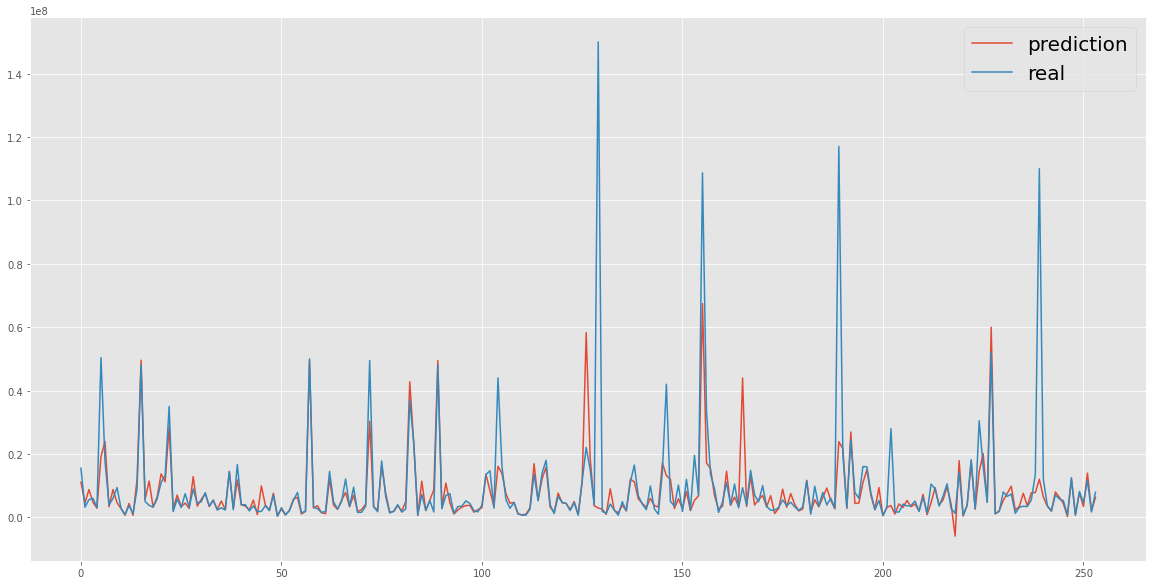

In [83]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(val_data_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [88]:
train_X = train.drop(['id', 'target'], axis = 1) #training 데이터에서 피쳐 추출
train_y = train.target #training 데이터에서 target 추출

In [89]:
#모델들을 할당할 리스트를 만들어줍니다.
models = []

#모델들을 각각 할당하여 리스트에 추가합니다.
models.append(ExtraTreesRegressor(n_estimators=110))
models.append(RandomForestRegressor(n_estimators=110))
models.append(GradientBoostingRegressor(learning_rate=0.22, criterion='absolute_error'))

#모델들을 할당한 리스트를 불러와 순차적으로 train 데이터에 학습을 시켜줍니다.
for model in models:
    model.fit(train_X, train_y)

C:\Users\SH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(


In [90]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = None

# 학습 된 모델들을 순차적으로 불러옵니다.
for model in models:
    # 각 모델들의 최종 회귀값들을 prediction에 모두 더해줍니다.
    if prediction is None:
        prediction = model.predict(test)
    else:
        prediction += model.predict(test)
        
# 앙상블에 참여한 모든 모델의 수 만큼 다시 나눠줍니다 (= 평균)
prediction /= len(models)

C:\Users\SH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 11 features, but ExtraTreesRegressor is expecting 10 features as input.